In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IRIS.csv",nrows = 100)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['species'] = df['species'].replace(['Iris-setosa'],0)
df['species'] = df['species'].replace(['Iris-versicolor'],1)
X1=df.values[:100,[0,2]]
Y1=df.values[:100,[4]].flatten()

In [ ]:
print(df.dtypes)

In [4]:
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y

In [5]:
# X1 = df.iloc[:,:-1].values
# Y1 = df.iloc[:,-1:].values

model = LogitRegression( learning_rate = 0.01, iterations = 1000 )
model.fit( X1, Y1 )  

In [7]:
Y_pred = model.predict(X1)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# importing the logistic model to check the correctness of above prediction
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.model_selection import train_test_split

In [ ]:
# model1 = LogisticRegression()    
# model1.fit( X1, Y1)
# y_pred1 = model1.predict(X1)
# y_pred1

In [43]:
correctly_classified = 0    
correctly_classified1 = 0
      
    # counter    
count = 0    
for count in range( np.size( Y_pred ) ) :  

    if Y1[count] == Y_pred[count] :            
        correctly_classified = correctly_classified + 1


    count = count + 1

print( "Accuracy on test set by our model       :  ", ( 
  correctly_classified / count ) * 100 )



Accuracy on test set by our model       :   100.0
Accuracy on test set by sklearn model   :   0.0


In [41]:
def plot_decision_boundary(X,Y, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    print(m,c)
    plt.scatter(X[:50,0], X[:50,1], marker="*",color="red", s=20, linewidths=5)
    plt.scatter(X[50:100,0],X[50:100,1], marker="*",color="blue", s=20, linewidths=5)
    plt.title('plot of petal_lentgh vs sepal_length')
    plt.xlabel('sepal_length')
    plt.ylabel('petal_length')
    inp=[i for i in range(3,10,1)]
    plt.plot(inp, m*inp+c)

    plt.show()
   

[0.46867991] [0.17983901]


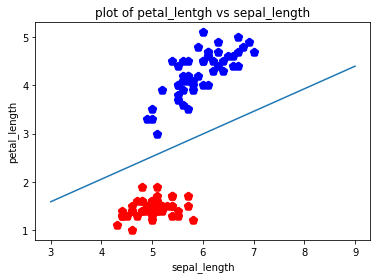

In [42]:

req=np.array([[model.W[0]],[model.W[1]]])
plot_decision_boundary(X1,Y1,req,model.b)